Installation and Set up

Installation and Set up

In [ ]:
pip install tensorflow_gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 17 kB/s 
     |████████████████████████████████| 6.0 MB 40.9 MB/s 
     |████████████████████████████████| 439 kB 52.8 MB/s 
     |████████████████████████████████| 1.7 MB 54.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Data Preprocessing

In [ ]:
# importing the dataset
from google.colab import files
upload = files.upload()

Saving G.Test2.csv to G.Test2.csv
Saving Train.csv to Train.csv


In [ ]:
training = pd.read_csv("/content/Train.csv")

In [ ]:
training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,28-11-2017,52.754501,53.118752,52.000000,52.370499,52.370499,28488000
1,29-11-2017,52.133999,52.203999,50.782501,51.083000,51.083000,49188000
2,30-11-2017,51.118500,51.424500,50.750000,51.070499,51.070499,34480000
3,01-12-2017,50.790001,51.124500,50.101002,50.508499,50.508499,38192000
4,04-12-2017,50.632999,50.805000,49.778500,49.933998,49.933998,38128000


In [ ]:
training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1256,23-11-2022,97.339996,99.069000,97.339996,98.820000,98.820000,17568900
1257,25-11-2022,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
1258,28-11-2022,97.199997,97.830002,95.889999,96.250000,96.250000,19974500
1259,29-11-2022,96.000000,96.389999,94.389999,95.440002,95.440002,20220000
1260,30-11-2022,95.120003,101.449997,94.669998,101.449997,101.449997,39888100


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1261 non-null   object 
 1   Open       1261 non-null   float64
 2   High       1261 non-null   float64
 3   Low        1261 non-null   float64
 4   Close      1261 non-null   float64
 5   Adj Close  1261 non-null   float64
 6   Volume     1261 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.1+ KB


In [ ]:
training_set = training.iloc[:, 1:2].values 

# By adding .values we are converting data into numpy arrays

In [ ]:
training_set.shape, training.shape
# Note that in training_set we have selected one column and in the training we have seven column.

((1261, 1), (1261, 7))

In [ ]:
# Feature scaling (Normalization)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
tr_set_scaled = sc.fit_transform(training_set)

# tr will be training_set after feature scaling.

In [ ]:
tr_set_scaled
# Now we can see that these values are scaled. 

array([[0.03934826],
       [0.03333381],
       [0.0234907 ],
       ...,
       [0.47015319],
       [0.45852176],
       [0.44999205]])

In [ ]:
# Creating a data stucture with 60 timesteps and 1 output.
x_train = []
y_train = []

for i in range(60, 1261):
  x_train.append(tr_set_scaled[i-60:i, 0])
  y_train.append(tr_set_scaled[i, 0])
# [i-60] is specifying the lower bound and [i-60:i] - and i here is specifying the upper bound, 0 is specifying the column index 
# as there is only one column. Also, since in python upper bound is excluded, the upper bound will take values from 0 to 59.



# Since x_train and y_train are the list and we have to convert them into numpy arrays.   

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.03934826, 0.03333381, 0.0234907 , ..., 0.06424928, 0.06896003,
        0.06723952],
       [0.03333381, 0.0234907 , 0.0203066 , ..., 0.06896003, 0.06723952,
        0.07458671],
       [0.0234907 , 0.0203066 , 0.01878479, ..., 0.06723952, 0.07458671,
        0.08110034],
       ...,
       [0.58646777, 0.60721052, 0.5761449 , ..., 0.46007266, 0.47151018,
        0.48241468],
       [0.60721052, 0.5761449 , 0.57251007, ..., 0.47151018, 0.48241468,
        0.47015319],
       [0.5761449 , 0.57251007, 0.58627394, ..., 0.48241468, 0.47015319,
        0.45852176]])

In [ ]:
y_train

array([0.07458671, 0.08110034, 0.07227498, ..., 0.47015319, 0.45852176,
       0.44999205])

In [ ]:
# With the above output, our model will learn the co-relation.

In [ ]:
x_train.shape

(1201, 60)

In [ ]:
# Reshaping the above dataset as RNN (Recurrent Neural Network(RNN)) network will take input in the form of 3 dimension.

x_train = x_train.reshape(1201, 60, 1) # These are the 3 dimensions for RNN
# 1219 is the batch size/the number of observations, 60 is the total number of columns and 1 is the predictor/indicator or (1 google 
# stock price). 


In [ ]:
x_train.shape # (Now it is in 3 dimension)

(1201, 60, 1)

Building LSTM 
(Long short-term memory (LSTM)[1] is an artificial neural network used in the fields of artificial intelligence and deep learning)

In [ ]:
# First we have to define an object (initializing the n/w or RNN)

# We are defining the object model of the Sequential class

model = tf.keras.models.Sequential()

In [ ]:
# First LSTM layer.

model.add(tf.keras.layers.LSTM(units = 60, activation = "relu", return_sequences = True, input_shape = (60, 1)))
# These are the units we want to have in this LSTM layer. 
# Activation function add non-linearity into the network
# If we want to add another LSTM layer, we would want this layer to return the sequences and if want to add a dense layer after this 
# layer, then we wouldn't want to return the sequences. 
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Adding a dropout layer. 
# Adding the dropout layer is a regularization technique, here we are dropping 20%(.20) neurons from the training.
# model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
# Second LSTM layer.

model.add(tf.keras.layers.LSTM(units = 60, activation = "relu", return_sequences = True))
# Second dropout layer.
model.add(tf.keras.layers.Dropout(0.2))

# Third LSTM layer.

model.add(tf.keras.layers.LSTM(units = 80, activation = "relu", return_sequences = True))
# Third dropout layer.
model.add(tf.keras.layers.Dropout(0.2))

# Fourth LSTM layer.

model.add(tf.keras.layers.LSTM(units = 120, activation = "relu")) # The reason return_sequences is deleted bcz we won't be adding any
# other LSTM layer but we will though add a new dense layer.
# Fourth dropout layer.
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# output layer

model.add(tf.keras.layers.Dense(units = 1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
# Compile the model

model.compile(optimizer = "adam", loss = "mean_squared_error")

# Training the model

In [ ]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 13s 199ms/step - loss: 0.0551
Epoch 2/100
38/38 [==============================] - 9s 238ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0048
Epoch 4/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0047
Epoch 5/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 7s 196ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 7s 191ms/step - loss: 0.0031
Epoch 11/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0034
Epoch 12/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0042
Epoch 13/100

Step 5: Making Predictions

In [ ]:
# importing the dataset
from google.colab import files
upload = files.upload()

Saving G.Test2.csv to G.Test2 (1).csv


In [ ]:
# Getting the real stock prices of month November 2022

test_data = pd.read_csv("/content/G.Test2.csv")

In [ ]:
test_data.shape

(20, 7)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
real_stock_price

array([[95.589996],
       [90.910004],
       [86.345001],
       [85.510002],
       [87.339996],
       [89.160004],
       [88.544998],
       [92.339996],
       [94.709999],
       [95.5     ],
       [98.669998],
       [98.019997],
       [97.18    ],
       [99.010002],
       [97.559998],
       [96.160004],
       [97.339996],
       [98.464996],
       [97.199997],
       [96.      ]])

In [ ]:
real_stock_price.shape

(20, 1)

In [ ]:
# Getting predicted stock prices of month December 2022
# Concatination
dataset_total = pd.concat((training["Open"], test_data["Open"]), axis = 0)

# Here we are concatenating on the basis of rows and not on the basis of columns

# Stock prices of previous 60 days for each day of Decemer 2022
inputs =  dataset_total[len(dataset_total) - len(test_data) - 60:].values

#reshape (converting into numpy array)
inputs = inputs.reshape(-1, 1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

# convert in numpy array
x_test = np.array(x_test)

# Convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



1/1 [==============================] - 1s 658ms/step


In [ ]:
print(predicted_stock_price[0]), print(real_stock_price[0])

[97.470245]
[95.589996]


(None, None)

Step 6: Visualization




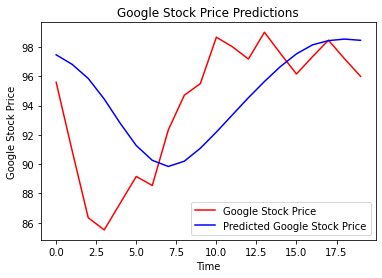

In [ ]:
# Visualizing the results
plt.plot(real_stock_price, color = "red", label = "Google Stock Price")

plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Predictions")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()